# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

### 1. Get the numerical variables from our dataset.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
numericals = df.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

Properties of Normal Distribution
- The mean, mode and median are all equal.
- The curve is symmetric at the center (i.e. around the mean, μ).
- Exactly half of the values are to the left of center and exactly half the values are to the right.
- The total area under the curve is 1.

In [61]:
def distributions(data):
    for col in data.columns:
        sns.distplot(numericals[col])
        plt.show()

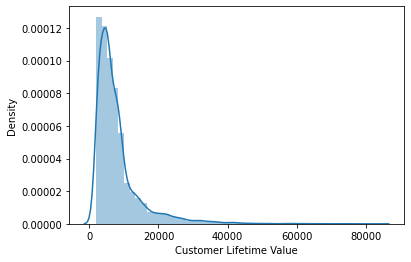

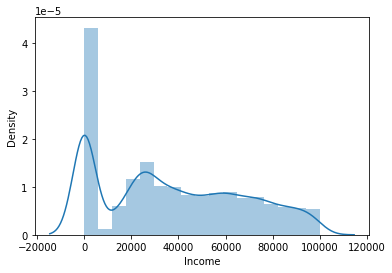

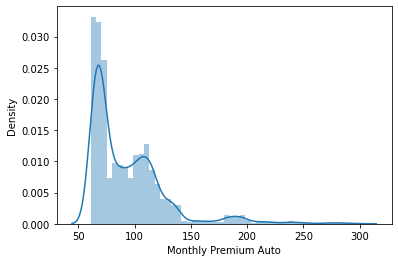

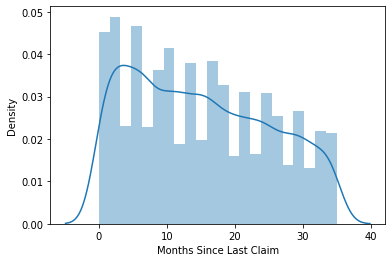

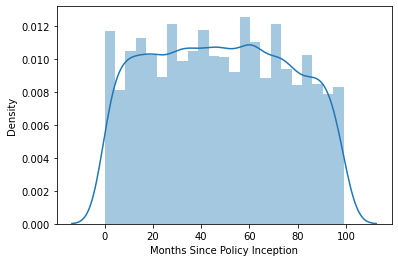

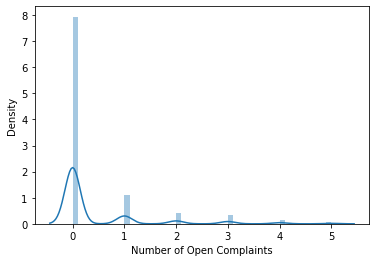

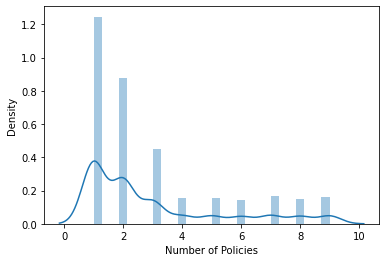

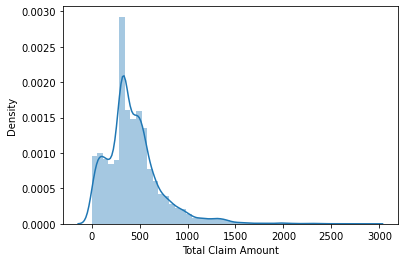

In [62]:
distributions(numericals)

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

Options:
* [3.1 Normalizer, MinMaxScaler, StandardScaler](#Normalizer)
* [3.2 Box Cox Transformation](#BoxCox)
* [3.3 Log Transformation](#Log)
* [3.4 Results](#Results)

In [51]:
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
import scipy.stats as stats

#### 3.1 Normalizer, MinMaxScaler, StandardScaler <a class="anchor" id="Normalizer"></a>

In [70]:
def Scalings(data, scaling_methods=[]):
    for method in scaling_methods:
        data_copy = data.copy()
        transformer = method
        transformer.fit(data_copy)
        x = transformer.transform(data_copy)
        numericals_final = pd.DataFrame(x, columns = data.columns)
        print("Distributions of:",method)
        distributions(numericals_final)     

Distributions of: Normalizer()


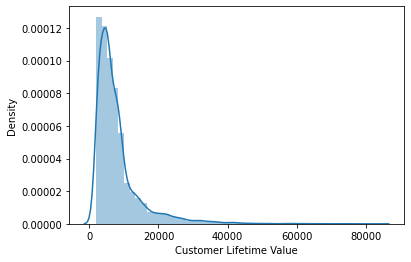

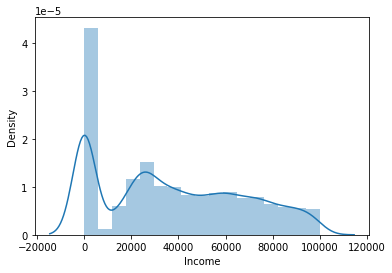

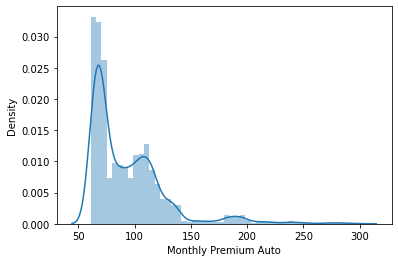

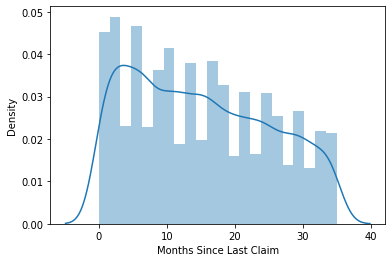

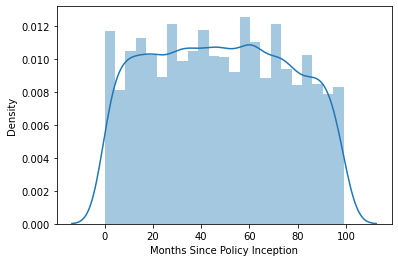

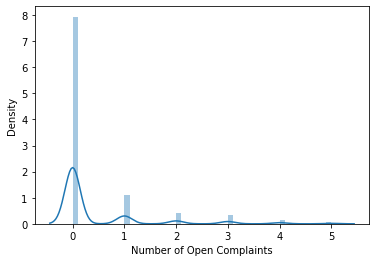

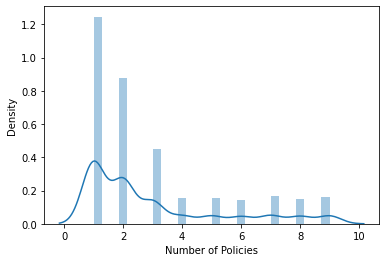

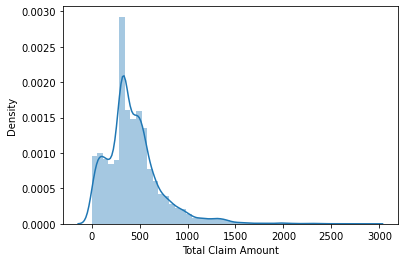

Distributions of: MinMaxScaler()


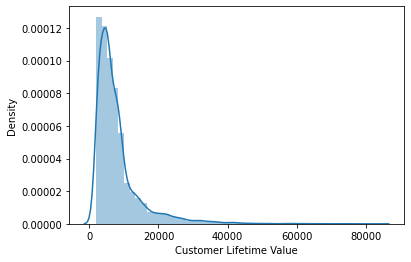

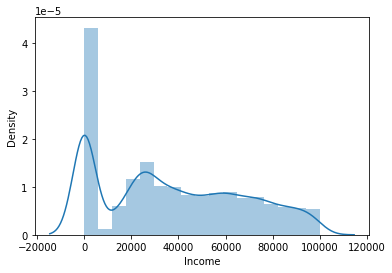

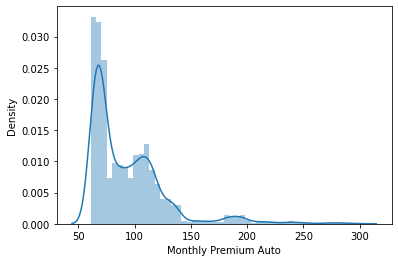

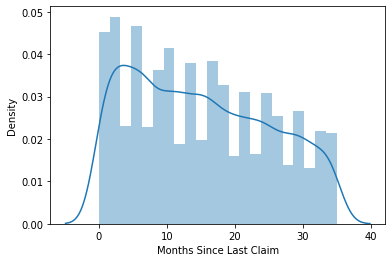

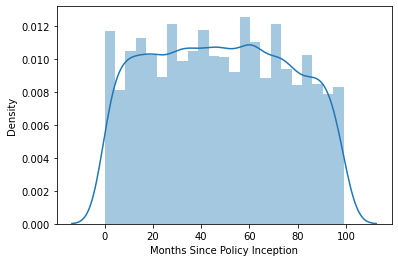

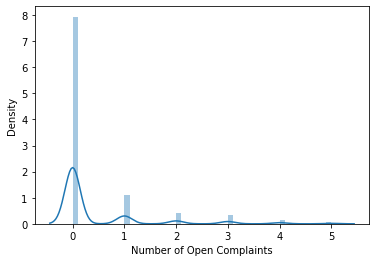

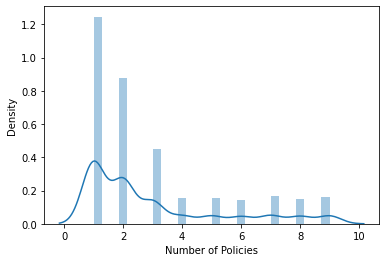

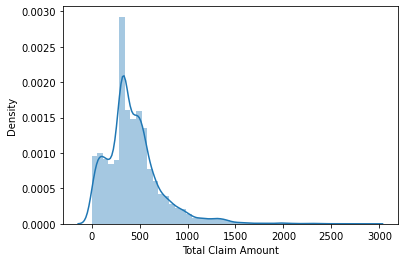

Distributions of: StandardScaler()


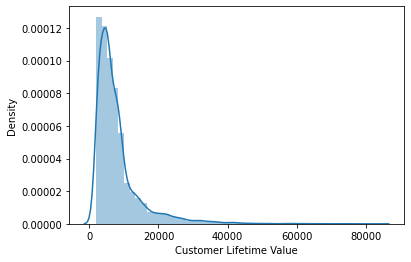

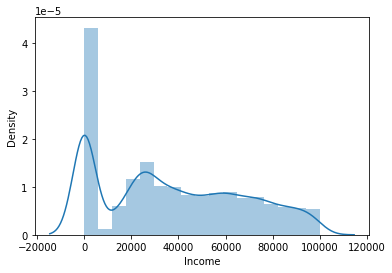

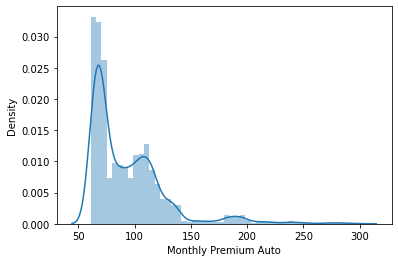

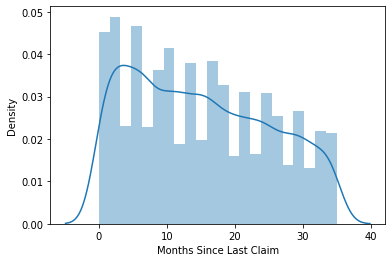

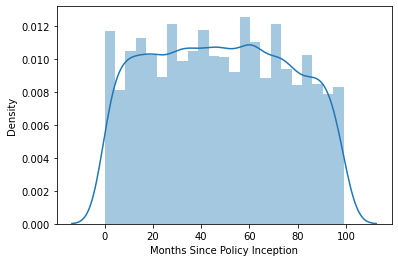

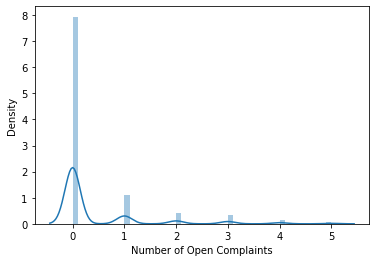

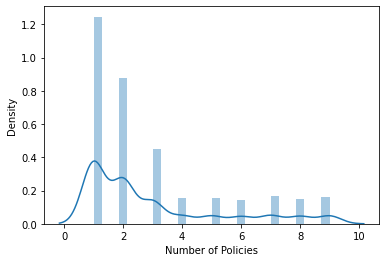

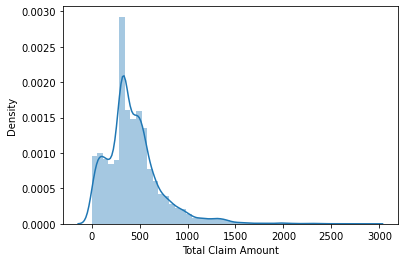

In [71]:
Scalings(numericals, scaling_methods=[Normalizer(),MinMaxScaler(),StandardScaler()])

#### 3.2 Box Cox Transformation <a class="anchor" id="BoxCox"></a>

In [50]:
num_boxcox = numericals.copy()

In [52]:
def boxcox_transform(data):
    _ci = {column: None for column in data.columns}
    for col in data:
        data[col] = np.where(data[col]<=0, np.NAN, data[col]) 
        data[col] = data[col].fillna(data[col].mean())
        transformed_data, ci = stats.boxcox(data[col])
        data[col] = transformed_data
        _ci[col] = [ci] 
    return data, _ci

num_boxcox, _ci = boxcox_transform(num_boxcox)

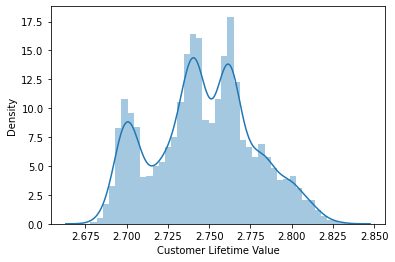

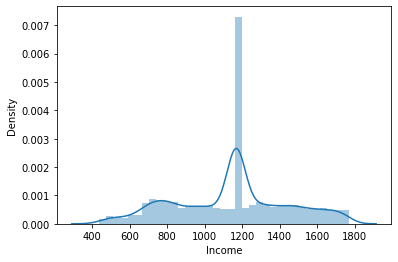

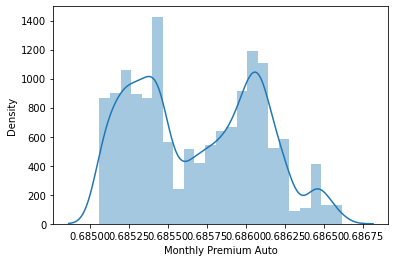

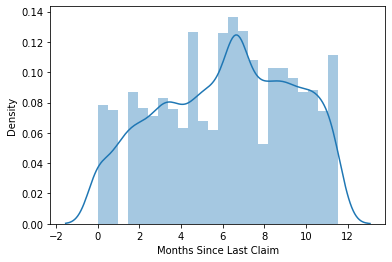

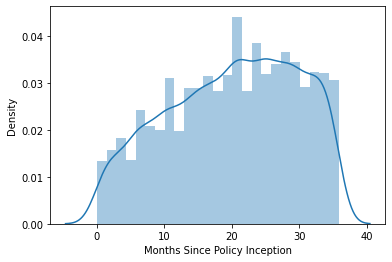

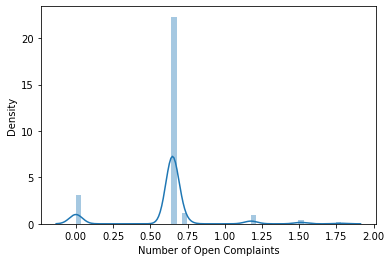

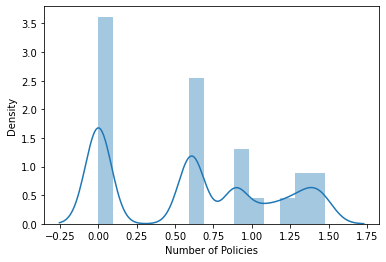

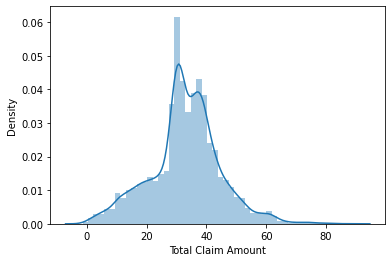

In [54]:
distributions(num_boxcox)

#### 3.3 Log Transformation <a class="anchor" id="Log"></a>

In [55]:
num_log = numericals.copy()

In [56]:
# lambda function
log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

# 'normal' function
def log_trans(x):
    x = np.log(x)
    if np.isfinite(x):
        return np.log(x)
    else:
        return np.NAN

In [57]:
for col in num_log:
    num_log[col] = num_log[col].apply(log_trans)
    num_log[col] = num_log[col].fillna(np.mean(num_log[col]))

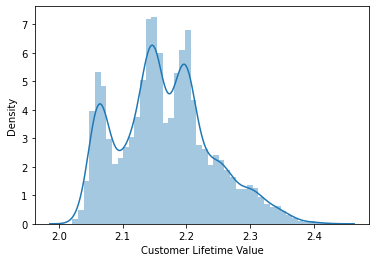

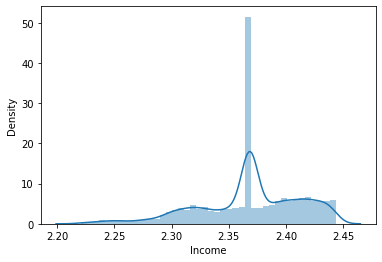

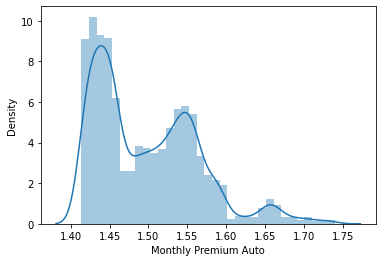

OverflowError: cannot convert float infinity to integer

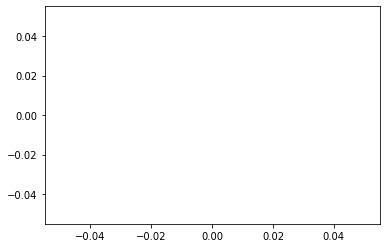

In [59]:
distributions(num_log)

In [60]:
# when are the columns covnerted into float infinity?

#### 3.6 Results <a class="anchor" id="Results"></a>

- Nearly all transformations didnt change the shape of the distribution but only the shape, except the boxcox transformation
- We have not removed outliers or null values etc. This might have improved the results
- Some of the columns can also be converted to categoricals